In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import os
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

os.environ["CUDA_VISIBLE_DEVICES"]= "-1" # Force Tensorflow on CPU instead of GPU (seems to avoid an error with my CUDA compatible GPU)

C:\Users\lyeso\anaconda3\envs\exts-ml\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Load training data form NPZ file

train_data = "train.npz"
X_tr = np.load(train_data)["features"]
y_tr = np.load(train_data)["labels"]
images_tr = np.load(train_data)["pixels"]

valid_data = "valid.npz"
X_val= np.load(valid_data)["features"]
y_val = np.load(valid_data)["labels"]
images_val = np.load(valid_data)["pixels"]

test_data = "test.npz"
X_te= np.load(test_data)["features"]
y_te = np.load(test_data)["labels"]
images_te = np.load(test_data)["pixels"]

# Create a dictionnary for labels
labels_dict = {0: 'bike', 1 : 'car', 2: 'motorcycle', 3: 'other', 4:'truck', 5: 'van'}

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)
X_val_scaled = scaler.fit_transform(X_val)
X_te_scaled = scaler.transform(X_te)

# Create the Decision Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree
dt = DecisionTreeClassifier(
    criterion='gini', max_depth=3, random_state=0)

In [5]:
# Fit decision tree
dt.fit(X_tr_scaled, y_tr)

# Get score
dt.score(X_te_scaled, y_te)

0.7

In [6]:
dt.predict_proba(X_te_scaled)[30]

array([0., 0., 1., 0., 0., 0.])

In [7]:
dt.predict(X_te_scaled)

array([0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 1., 1., 4., 1., 1.,
       1., 4., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 4.,
       4., 4., 4., 4., 4., 0., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
      dtype=float32)

In [8]:
pd.value_counts(y_te, normalize=True)

0.0    0.24
1.0    0.22
2.0    0.18
4.0    0.14
3.0    0.12
5.0    0.10
dtype: float64

In [9]:
from sklearn.tree import export_graphviz

# Export decision tree
dot_data = export_graphviz(
    dt, out_file=None,
    class_names=list(labels_dict.values()),
    filled=True, rounded=True, proportion=True   
)

# Show Graphviz

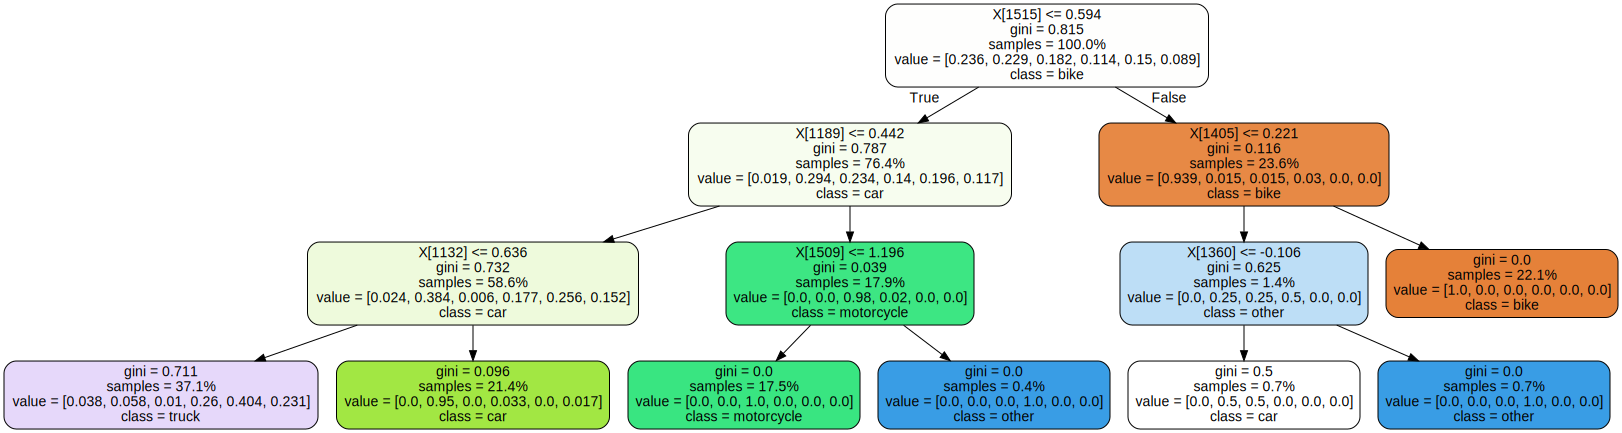

In [10]:
import graphviz

# Display decision tree
graphviz.Source(dot_data)

# PCA & Decision Tree

In [11]:
# Create PCA transformer with no limit on the number of components
from sklearn.decomposition import PCA

pca = PCA(n_components=None)


In [12]:
# Apply PCA to rescaled data
X_tr_pca = pca.fit_transform(X_tr_scaled)

X_val_pca = pca.transform(X_val_scaled)

X_te_pca = pca.transform(X_te_scaled)

In [13]:
X_tr_pca.shape

(280, 280)

In [14]:
# Create decision tree
dt_pca = DecisionTreeClassifier(
    criterion='gini', max_depth=3, random_state=0)

In [15]:
dt_pca.fit(X_tr_pca, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [16]:
# Get score
dt_pca.score(X_te_pca, y_te)

0.82

### When working with PCA, we have 12 pts better predictions than Decision Tree alone.

In [17]:
import csv

header = ['model', 'test_accuracy']
data = ['Decision Tree',dt_pca.score(X_te_pca, y_te)]


with open('Results.csv', 'a', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)


    # write the data
    writer.writerow(data)